a) Supervised ML
Regression
Classification

b) Unsupervised ML
   Clustering - Grouping
   
c) Semisupervised ML - not required

d) Reinforcement Learning - not required

Linear Regression

y = mx + c

y = Prediction
m = slope
x = data
c = Intercept

Problem Statement:
This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sale and is there a way to optimise the sale

In [2]:
#necessary imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Advertising.csv') #Reading the data file

In [4]:
data.head() # Check the top 5 rows

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Features

a) TV
b) Radio
c) Newspaper

Benefits

a) Sales

In [5]:
data.shape

(200, 5)

In [6]:
data.info() #printing the summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.isna().sum() #finding the count of missing values from different columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Now lets schowcase the relationship between features and target column

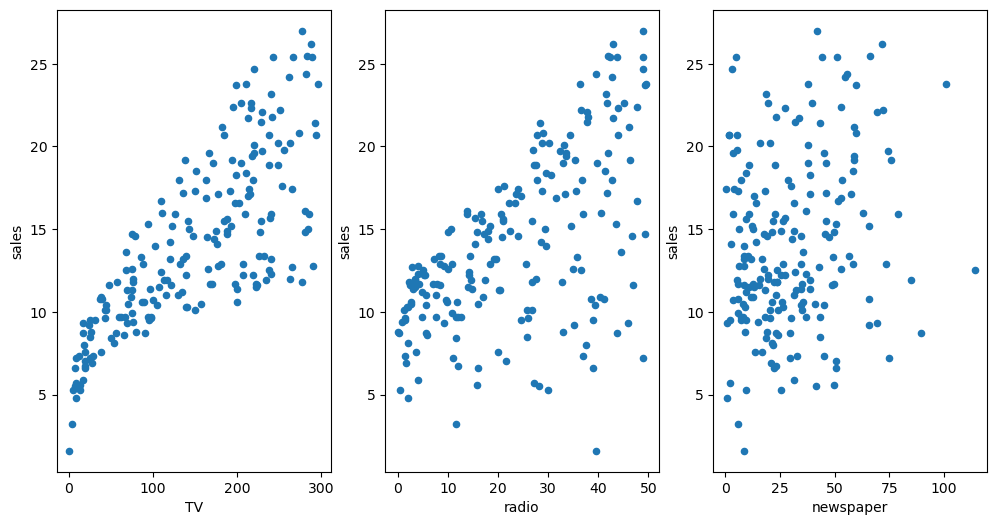

In [8]:
#visualize the relationship between the feature and target using scatterplots

fig,axs = plt.subplots(1,3)

data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(12,6))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
fig.savefig('testdata.jpg')

Simple Linear Regression is the method for predicting a quantitative response using a single feature ("Input variable")

y=mx+c

y is the response of target variable
x is the feature
m is the coefficient/slope of x
c is the intercept

Mathematical residual is Actual - Prediction in normal terms

r = y - (mx+c)

Residual for one point is r1 = y1 -(mx1 + b)

Sum of Residuals = Sum(n where i=total count)r1 =Sum(n where i=total count)y1 - (mx1 + b)

Sum of square of residuals = Sum(n where i=total count)(r1)*2 =Sum(n where i=total count)(y1 - (mx1 + b))*2

"Global Minima is called Zero error"

Gradient Descent is when the difference between Actual and prediction reduces looking at the pattern

In [9]:
#create x=feature and y=label

x = data[['TV']]
y = data.sales

#follow the ususal sklearn pattern import, instantiate, fit

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x,y)  #Model Training

LinearRegression()

In [10]:
#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [12]:
#Calculate the prediction
7.032594+0.047537*50

9.409444

In [ ]:
#Predict sales would be 9.409. Lets run the model

In [13]:
lm.predict([[50]])

C:\Users\ursheshu.upadhyay\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

Model Confidence

R2 Statistics = 1 - RSS/TSS

RSS = Actual - Prediction
TSS = Actual - Mean

In [14]:
from sklearn.metrics import r2_score

In [15]:
#Pass all TV records and predict sales
predicted_sales = lm.predict(x)

In [16]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [20]:
predicted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [22]:
#Lets compare original sales numbers with our model predicted sales
r2_score(y_true=y, y_pred=predicted_sales)

0.611875050850071

Adjusted R2 Statistics

1 - (1-R*2)(N-1)/N-P-1

where 
R2 - Sample Rsquare
P - Number of Predictors
N - Total sample size

Multiple Linear Regression

In [27]:
#Create x and y
x = data[['TV','radio','newspaper']]
y = data.sales

lm = LinearRegression()
lm.fit(x,y)

#print intercept and coefficients
print('Intercept: - ',lm.intercept_)
print('TV: ', lm.coef_[0])
print('Radio: ', lm.coef_[1])
print('newspaper: ', lm.coef_[2])

Intercept: -  2.9388893694594085
TV:  0.045764645455397615
Radio:  0.18853001691820456
newspaper:  -0.0010374930424763272


In [28]:
#Preparing data with two features to show the impact on R2 SCore
x = data[['TV','radio']]
y = data.sales

In [29]:
#Lets feed the features and label and train the model
lm.fit(x,y)

LinearRegression()

In [30]:
#Check the R2
predicted_sales = lm.predict(x)
r2_score(y,predicted_sales)

0.8971942610828956

In [31]:
#Preparing data with all features to show the impact on R2 SCore
x = data[['TV','radio', 'newspaper']]
y = data.sales

lm.fit(x,y)  #model training

#Check the R2
predicted_sales = lm.predict(x)
r2_score(y,predicted_sales)

0.8972106381789522